<a href="https://colab.research.google.com/github/AakashPuthussery/Machine-Learning/blob/main/NaiveBayes_(Iirs_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 97.78%


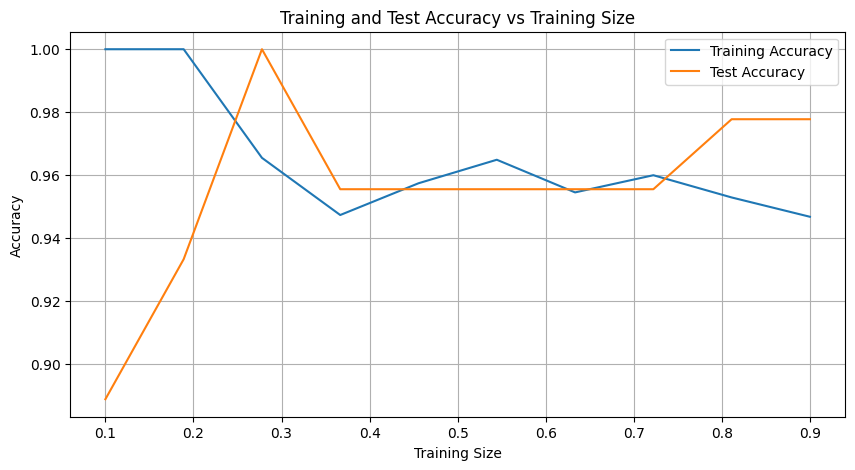

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
file_path = '/content/iris.csv'  # Replace with your file path
iris_data = pd.read_csv(file_path)

# Step 2: Preprocess the dataset
# Convert 'variety' column to numerical labels
label_encoder = LabelEncoder()
iris_data['variety'] = label_encoder.fit_transform(iris_data['variety'])

# Split dataset into features (X) and target (Y)
X = iris_data.drop('variety', axis=1)
Y = iris_data['variety']

# Step 3: Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 4: Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Step 5: Make predictions on the test set
Y_pred = model.predict(X_test)

# Step 6: Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 7: Plot training and test accuracy
train_sizes = np.linspace(0.1, 0.9, 10)
train_accuracies = []
test_accuracies = []

for train_size in train_sizes:
    X_train_partial, _, Y_train_partial, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model.fit(X_train_partial, Y_train_partial)
    train_accuracies.append(model.score(X_train_partial, Y_train_partial))
    test_accuracies.append(model.score(X_test, Y_test))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_accuracies, label="Training Accuracy")
plt.plot(train_sizes, test_accuracies, label="Test Accuracy")
plt.title("Training and Test Accuracy vs Training Size")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [4]:

# Step 8: Predict based on user input
def predict_iris():
    print("\nEnter the sepal length, sepal width, petal length, and petal width:")
    sepal_length = float(input("Sepal length: "))
    sepal_width = float(input("Sepal width: "))
    petal_length = float(input("Petal length: "))
    petal_width = float(input("Petal width: "))

    # Create a numpy array with user input
    user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Make a prediction
    prediction = model.predict(user_input)
    variety = label_encoder.inverse_transform(prediction)
    print(f"\nThe predicted variety is: {variety[0]}")

# Call the function for user input
predict_iris()



Enter the sepal length, sepal width, petal length, and petal width:
Sepal length: 5.1
Sepal width: 3.5
Petal length: 1.4
Petal width: 0.2

The predicted variety is: Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Accuracy: 97.78%
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


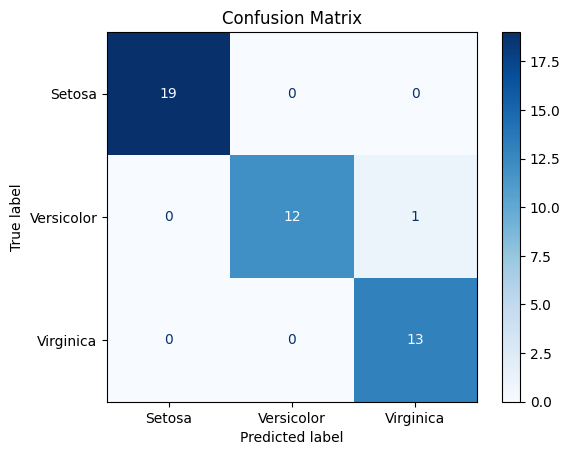

In [5]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 5: Make predictions on the test set
Y_pred = model.predict(X_test)

# Step 6: Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 7: Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
